## Polynom

Polynomem $p(x)$ stupně $n$ nazýváme výraz tvaru

$$
p(x) = \sum_{i=0}^n a_i x^i = a_0 + a_1 \cdot x + \ldots + a_n \cdot x^n
$$
a čísla $a_i \in \mathcal{R},\ i=1,\dots n$ se nazývají koeficienty.

Napište funkci, která vyhodnotí polynom zadaný n-ticí koeficientů v bodě x, tj.
```python
# polynom(x, 3, 2, 1) vyhodnoti 3 + 2x + x^2
polynom(1, 3, 2, 1)
>> 6
```

Je vhodné pro zápis polynomu použít tzv. Hornerovo schéma (ušetří mnoho operací a snáze se implementuje). Pro polynom stupně 3 vypadá takto:
$$
a_0 + a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x^3 = a_0 + x \cdot ( a_1 + x \cdot ( a_2 + a_3 \cdot x) )
$$

In [1]:
def polynom(x, *coefs):
    val = coefs[-1]
    for c in coefs[-2::-1]:
        val = val * x + c
    return val

polynom(1, 3, 2, 1)


6

In [2]:
coefs = (0, 0, 1)

polynom(2, *coefs)

4

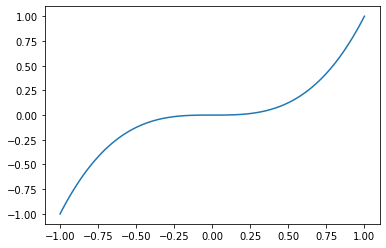

In [7]:
import matplotlib.pyplot as plt # pip3 install matplotlib
import numpy as np # pip3 install numpy
coefs = (0, 0, 0, 1)

x = np.linspace(-1., 1., 101)
y = polynom(x, *coefs)

plt.plot(x, y)
plt.show()

## break a continue

In [5]:
for i in range(10):
    if i == 5:
        break
    print(i)
    
print("po cyklu")

0
1
2
3
4
po cyklu


In [6]:
for i in range(10):
    if i == 5:
        continue
    print(i)

0
1
2
3
4
6
7
8
9


## vlastni moduly

In [16]:
import module

module.function()

0.17934562628991124

In [17]:
from module import function as mfunc
mfunc()

0.6043335489017742

In [19]:
import package.module_a as ma
from package.module_b import *
ma.function_a()
function_b()

this is function from module A
this is function from module B


In [2]:
import package.constants as mc

mc.PI
mc.__name__

this is constants module


'package.constants'

In [1]:
import repa

loading repa as a module


## Dekoratory

In [4]:
# dekorator: funkce, ktera vraci funkci
def dec(func):
    def wrapper():
        print("calling function", func.__name__)
        func()
        
    return wrapper

def f():
    print("Hallo")
    
g = dec(f)
g()

calling function f
Hallo


In [5]:
@dec # tohle je to same jako f=dec(f)
def f():
    print("Hallo")
    
f()

calling function f
Hallo


In [10]:
def dec(func):
    def wrapper(*args, **kwargs):
        print("calling function", func.__name__)
        return func(*args, **kwargs)
        
    return wrapper

@dec
def add(x, y):
    return x + y

x = add(1,2)
print(x)

calling function add
3


In [12]:
def underline(func):
    def wrapper(*args, **kwargs):
        res = func(*args, **kwargs)
        print("-" * 20)
        return res
        
    return wrapper

@underline
def say_hello():
    print("hello")
    
say_hello()

hello
--------------------


In [17]:
def underline(width =20):
    def dec(func):
        def wrapper(*args, **kwargs):
            res = func(*args, **kwargs)
            print("-" * width)
            return res

        return wrapper
    return dec

@underline()
def say_hello():
    print("hello")
    
say_hello()

hello
--------------------


In [29]:
LOG_INFO    = 0
LOG_WARNING = 1
LOG_DEBUG   = 2

LOG_STR = ["INFO", "WARNING", "DEBUG"]

log_level = LOG_DEBUG

def log(level = LOG_INFO, width = 0):
    def dec(func):
        @underline(width)
        def wrapper(*args, **kwargs):
            if level <= log_level:
                print("{}: running function: {}".format(LOG_STR[level], func.__name__))
                if log_level >= LOG_DEBUG:
                    print("\targs", args)
                    print("\tkwargs", kwargs)
            return func(*args, **kwargs)
            
        return wrapper
    
    return dec

@log(LOG_DEBUG, 40)
def add(x, y):
    return x+y

@log(LOG_WARNING)
def do_warning_level_stuff():
    pass

add(1,2)
do_warning_level_stuff()

DEBUG: running function: add
	args (1, 2)
	kwargs {}
----------------------------------------
	args ()
	kwargs {}

